# Plots y Visualización de los Datos

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("../../ReposCurso/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [73]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [74]:
%matplotlib inline

In [75]:
# Savefig("path donde guardar la imagen.jpeg")

## Scatter Plot

Graficamos los minutos de llamada y el costo total de día y de noche

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

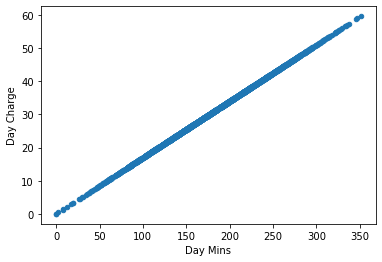

In [76]:
data.plot(kind="scatter", x = "Day Mins", y = "Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

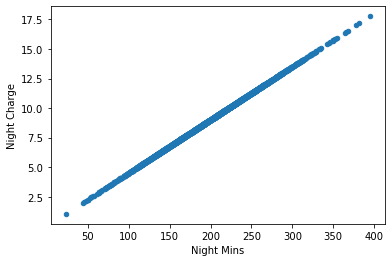

In [77]:
data.plot(kind="scatter", x = "Night Mins", y = "Night Charge")

Para dibujar una matriz de gráficos:
* Primero se crean dos variables: figure (para las graficas) y axs (paa los ejes).
* (2,2, .. Significa una matriz de 2x2
* sharey/sharex significa que los gráficos compartirán x e y
* ax = axs[0][0] indica la posición de cada gráfico, en este caso sería la primera matriz (ax -> axes)

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

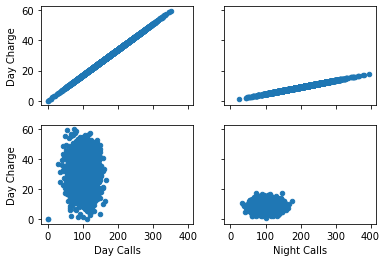

In [78]:
figure, axs = plt.subplots(2,2, sharey = True, sharex = True)
data.plot(kind = "scatter", x = "Day Mins", y = "Day Charge", ax = axs[0][0])
data.plot(kind = "scatter", x = "Night Mins", y = "Night Charge", ax = axs[0][1])
data.plot(kind = "scatter", x = "Day Calls", y = "Day Charge", ax = axs[1][0])
data.plot(kind = "scatter", x = "Night Calls", y = "Night Charge", ax = axs[1][1])

## Histograma de Frecuencias

* Para llamar a la función de histograma, se usa plt.hist.
* bins = x indica la cantidad de cuadros o divisiones que tendrá el gráfico en el eje X

Text(0.5, 1.0, 'Histograma del Número de Llamadas al Día')

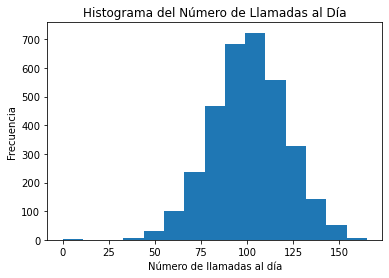

In [79]:
plt.hist(data["Day Calls"], bins = 15)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del Número de Llamadas al Día")

 * bins se puede poner con la cantidad de divisiones totales aleatorias o se pueden definir, por ejemplo bins =[0,30, 60, 90, ...]


Text(0.5, 1.0, 'Histograma del Número de Llamadas al Día')

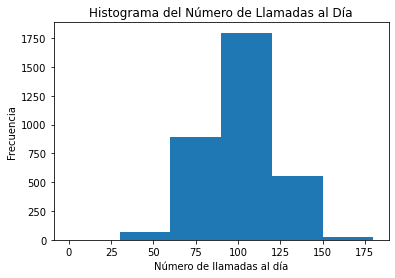

In [80]:
plt.hist(data["Day Calls"], bins = [0, 30, 60, 90, 120, 150, 180])
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del Número de Llamadas al Día")

La Regla de Sturges indica cuantas clases o divisiones deben considerarse al hacer un histograma.
* c = 1 + log2 (M); donde M es el tamaño de la muestra
bins = 1 + log2 (3333) 

* se debe importar la librería de numpy

In [92]:
1+np.log2(3333)

12.702605602110248

In [94]:
# Vamos a redondear al numero siguiente con la función np.ceil y pasaremos a un entero con la funcion int
k = int(np.ceil(1+np.log2(3333)))
k

13

Text(0.5, 1.0, 'Histograma del Número de Llamadas al Día')

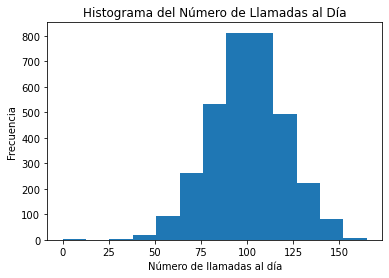

In [95]:
plt.hist(data["Day Calls"], bins = k)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del Número de Llamadas al Día")

## Boxplot: Diagrama de Cajas y Bigotes

Text(0.5, 1.0, 'Boxplot de las Llamadas Diarias')

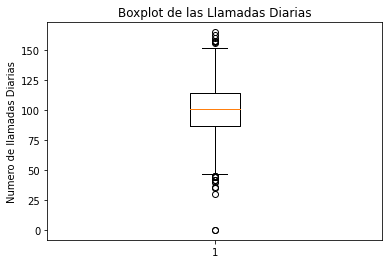

In [100]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Numero de llamadas Diarias")
plt.title("Boxplot de las Llamadas Diarias")

* Dentro de la caja de representa desde el percentil 25% al 75% de los datos. De 0% a 25% y de 75% a 100% están fuera.
* La línea que cruza la caja es la mediana (el valor central de los datos).
* Para el ejemplo, la caja empieza en 87(25%) hasta 114(75%) y su mediana es 101(50%).

In [111]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

* Rango intercuartil (IQR): Resta de los bordes de la caja -> 114 - 87 = 27.

In [113]:
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
IQR

27.0

* Los bigotes se marcan 1.5 veces el rango intercuartil hacia arriba y hacia abajo de los bordes de la caja. Si un valor está más allá del rango, se pintarán como bolita y se llamará como "valor Outlier", "Valor fuera de lugar" o "atípico"

In [116]:
data["Day Calls"].quantile(0.75) + (IQR * 1.5)

154.5

In [117]:
data["Day Calls"].quantile(0.25) - (IQR * 1.5)

46.5